# 2019380415 김선엽 week03 고급비즈니스어낼리틱스 과제

## 사전 실습

### 분석 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


### 데이터 불러오기

In [5]:
data = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 데이터 묘사 관련 함수

In [ ]:
data.info() # data의 타입, 카운트, null 여부 등을 확인
data.describe() # data의 요약 통계
data.shape # 데이터의 행, 열의 수를 (n, m)의 형태로 제공
data.columns # 데이터의 속성(열) 나열

### Null 값 확인

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 중복된 행 체크

In [7]:
data.duplicated().value_counts()    # False 1470 => 중복되지 않은 행이 1470개 존재

False    1470
Name: count, dtype: int64

### 이상치 분석

In [8]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)  # 하위 25% 계산
    q3 = df.quantile(0.75)  # 상위 25% 계산
    iqr = q3-q1 # 중간 50%
    Lower_tail = q1 - 1.5 * iqr # 하한 계산
    Upper_tail = q3 + 1.5 * iqr # 상한 계산
    for i in df:
        if i > Upper_tail or i < Lower_tail: # 하한보다 작고 상한보다 크면 이상치로 간주
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['MonthlyIncome'])

# 결과값들이 이상치

Outliers: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]


### 1. Box plot

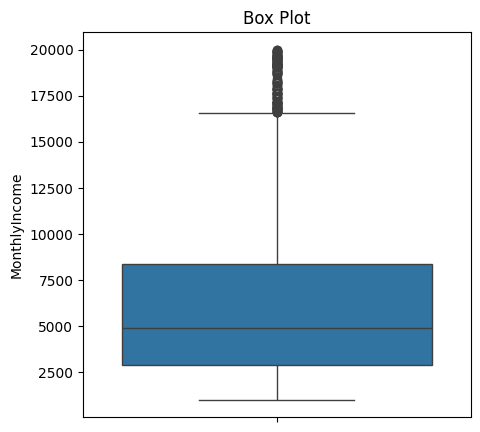

In [ ]:
def Box_plots(df):
    plt.figure(figsize=(5, 5))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(data['MonthlyIncome'])

### 2. Scatter plot

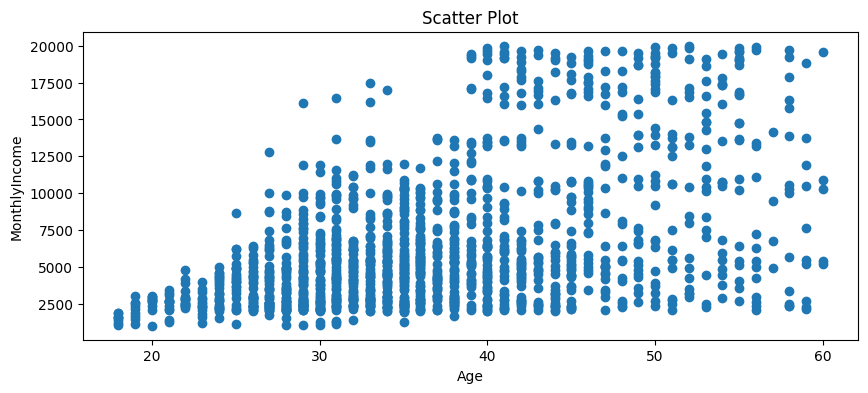

In [ ]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('MonthlyIncome')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data['Age'],data['MonthlyIncome'])

/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_3649/313817430.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


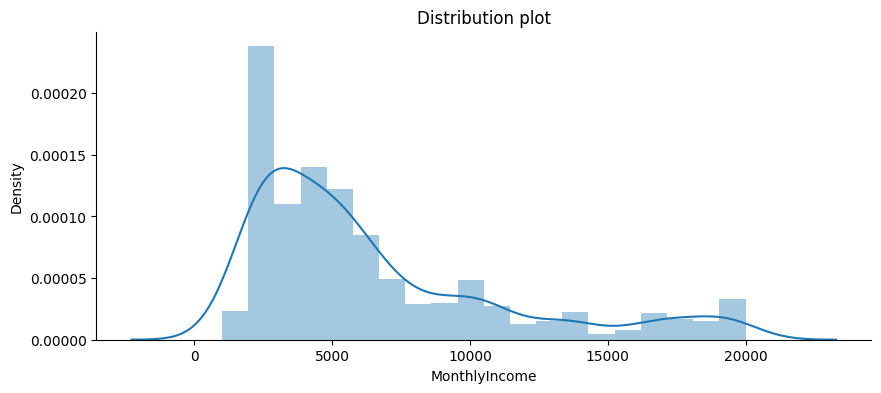

In [ ]:
def dist_plots(df):
    plt.figure(figsize=(10, 4)) # 그래프 크기 설정
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data['MonthlyIncome'])